# Game of Life

In [6]:
import matplotlib
matplotlib.use("Agg")
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
class Game(object):
    
    def __init__(self, state):
        self.state = state

    def step(self, count = 1):
        for generation in range(count):
            new_board = [[False] * self.state.width for row in range(self.state.height)]

            for y, row in enumerate(self.state.board):
                for x, cell in enumerate(row):
                    neighbours = self.neighbours(x, y)
                    previous_state = self.state.board[y][x]
                    should_live = neighbours == 3 or (neighbours == 2 and previous_state == True)
                    new_board[y][x] = should_live

            self.state.board = new_board

    def neighbours(self, x, y):
        count = 0
        for hor in [x-1, x, x+1]:
            for ver in [y-1, y, y+1]:
                if (hor != x or ver != y) and (0 <= hor < self.state.width and 0 <= ver < self.state.height):
                    count += self.state.board[ver][hor]
        return count

    def display(self):
        image = plt.imshow(self.state.board, cmap='gray', interpolation='none')

class State(object):
    
    def __init__(self, width, height, board = None):
        if not board:
            self.board = [[random.getrandbits(1) for x in range(width)] for y in range(height)]
        self.width = width
        self.height = height

/Users/jgzuke/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


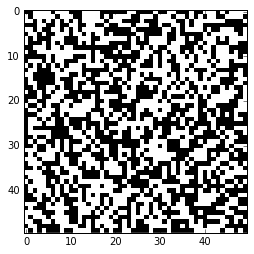

In [2]:
my_game = Game(State(width = 50, height = 50))
my_game.display()

/Users/jgzuke/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


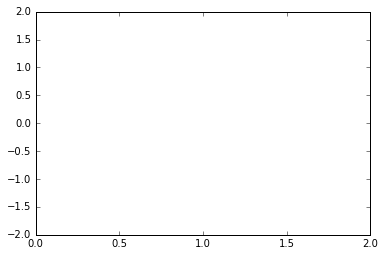

In [5]:
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
line_ani.save('lines.mp4', writer=writer)

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
im_ani.save('im.mp4', writer=writer)